                                                bgg_url  game_id       names  \
rank                                                                           
1     https://boardgamegeek.com/boardgame/174430/glo...   174430  Gloomhaven   

      min_players  max_players  avg_time  min_time  max_time  year  \
rank                                                                 
1               1            4       120        60       120  2017   

      avg_rating  geek_rating  num_votes  \
rank                                       
1        8.98893      8.61858      15376   

                                              image_url  age  \
rank                                                           
1     https://cf.geekdo-images.com/original/img/lDN3...   12   

                                               mechanic  owned  \
rank                                                             
1     Action / Movement Programming, Co-operative Pl...  25928   

                       

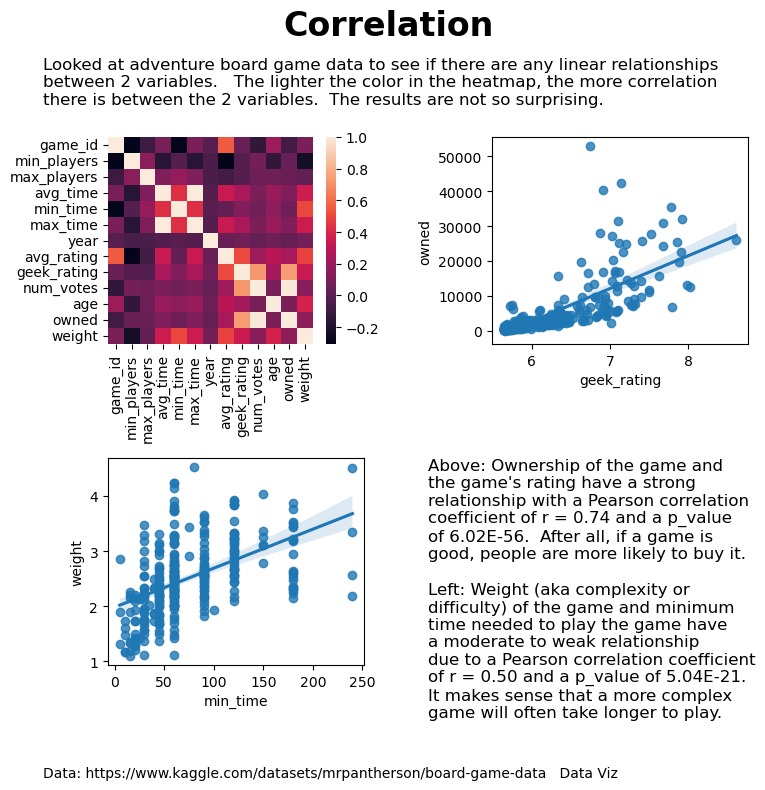

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('bgg_db_1806.csv', header=0, index_col=0)
print(df.head(1))
print(df.columns)

# just the numerical data
df2 = df[['game_id', 'min_players', 'max_players', 'avg_time',
       'min_time', 'max_time', 'year', 'avg_rating', 'geek_rating',
       'num_votes', 'age', 'owned', 'weight']]
print(df2)

corr_matrix = df2.corr()
round(corr_matrix,2)

# This code uses the OO-style matplotlib, using subplots().
fig, ax = plt.subplots(2, 2,   # 2 rows, 2 col of subplots
    figsize = (8,8)          # dimensions of the figure in inches
)

# adjust the spacing between subplots
fig.subplots_adjust(
    left=0.15,
    right=0.95,
    bottom=0.16,
    top=0.82,
    wspace=0.5,
    hspace=0.55
)

#########################################################################
#  Title Area
#########################################################################

# main title above everything else
plt.suptitle("Correlation", 
    fontsize=24,
    fontweight='bold'
)

# text just below the title
plt.figtext(0.069, 0.92,
    "Looked at adventure board game data to see if there are any linear relationships\nbetween 2 variables.   The lighter the color in the heatmap, the more correlation\nthere is between the 2 variables.  The results are not so surprising.",
    ha="left",
    va="top",
    fontsize=12)


#########################################################################
# Footer
#########################################################################

plt.figtext(0.069, 0.02,
    "Data: https://www.kaggle.com/datasets/mrpantherson/board-game-data   Data Viz",
    ha="left",
    fontsize=10)

'''
sns.heatmap(corr_matrix, ax=ax[0,0])

sns.scatterplot(x="avg_time", y="avg_rating", data=df2, ax=ax[0,1])
ax[0,1].set_title("Avg Time vs Avg Rating")
ax[0,1].set_xlabel("Avg Time");

sns.regplot(x="avg_time", y="avg_rating", data=df2, ax=ax[1,1])
'''



#########################################################################
#  Helper Functions 
#########################################################################

def make_text_section( _ax):
    # remove spines
    for loc in ['top','right','bottom','left']:
        _ax.spines[loc].set_visible(False)

    # remove x ticks and y ticks
    _ax.set_xticks([])
    _ax.set_yticks([])

    # coordinates on the x-axis and the y-axis will range from 0 to 1
    _ax.set_xlim(0,1)
    _ax.set_ylim(0,1)


def write_text( _ax, y, txt, _fontsize=12):
    _ax.text( -0.25,
        y,
        txt,
        ha="left",  # horizontalalignment
        va= "top",
        fontsize=_fontsize)

# Let's get an idea of what's in the 'category' column
def explore_categories():

    # df.category.head(20)   # strings are abbrev.

    # print entire string, not abbrev.
    for i in range(1,21):    # rank starts at 1, not 0
        print(df.loc[i,'category'])


def get_categories():
    #create a set with all the unique category names
    category_set = set()

    num_entries = len(df['category'])

    for i in range(1,num_entries):    # rank starts at 1, not 0
        s = df.loc[i,'category'].split(",")
        for c in s:
            category_set.add(c.strip())

    categories = sorted(list(category_set))
    print(categories)
    return categories


categories = get_categories()

# How many games are in each category?
cat_len = []
for cat in categories:
    cat_len.append(len(df[df['category'].str.contains(cat)]))
print(cat_len)



df_Gloomhaven = df[df['names']=='Gloomhaven']
# https://boardgamegeek.com/boardgame/174430/gloomhaven
# This above page confirms the time is in min
df_Gloomhaven.loc[1,'max_time']



# What the 3 outliers, in terms of avg_time?
outliers = df[df['avg_time'] > 10000]
outliers.category
"Wargame" in outliers.loc[966,"category"]   # True
# So the very long games are all "Wargame"s

wargame_df = df[df['category'].str.contains("Wargame")]


#################################################################

adventure_df = df[df['category'].str.contains("Adventure")]
#corr_matrix = adventure_df.corr()

# Selecciona solo las columnas numéricas
adventure_df_numeric = adventure_df.select_dtypes(include=[np.number])

# Calcula la correlación solo con las columnas numéricas
corr_matrix = adventure_df_numeric.corr()
round(corr_matrix, 2)
sns.heatmap(corr_matrix, ax=ax[0,0])
sns.regplot(x="geek_rating", y="owned", data=adventure_df, ax=ax[0,1])

sns.regplot(x="min_time", y="weight", data=adventure_df, ax=ax[1,0])
make_text_section( ax[1,1])
'''
sns.scatterplot(x="avg_time", y="avg_rating", data=df2, ax=ax[0,1])
ax[0,1].set_title("Avg Time vs Avg Rating")
ax[0,1].set_xlabel("Avg Time");

sns.regplot(x="avg_time", y="avg_rating", data=df2, ax=ax[1,1])
'''

#ax[1,1].set_facecolor('green')

r, p_value = stats.pearsonr(adventure_df['geek_rating'], adventure_df['owned'])
write_text( ax[1,1], 1, "Above: Ownership of the game and\nthe game's rating have a strong\nrelationship with a Pearson correlation\ncoefficient of r = " + f"{r:.2f} and a p_value\nof {p_value:.2E}.  After all, if a game is\ngood, people are more likely to buy it.")

r, p_value = stats.pearsonr(adventure_df['min_time'], adventure_df['weight'])
write_text( ax[1,1], 0.4, "Left: Weight (aka complexity or\ndifficulty) of the game and minimum\ntime needed to play the game have\na moderate to weak relationship\ndue to a Pearson correlation coefficient\nof r = " + f"{r:.2f} and a p_value of {p_value:.2E}.\nIt makes sense that a more complex\ngame will often take longer to play.")


plt.savefig('day13.png')

##########################################
#  Data exploration, but didn't use it in the graph...  
#  TODO: move unused code here
#  TODO: organize graph building separately from data manipulation
##########################################